In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [2]:
def count_values(arr):
  unique_values, counts = np.unique(arr, return_counts=True)

  # Print the unique values and their frequencies
  for value, count in zip(unique_values, counts):
      print(f"{value}: {count}")

In [3]:
def segmantation(X,y,window_length=36 ,step_size=1):
      # Define sliding window parameters
        # Amount of overlap between segments
      # Segment the time series data with sliding window
      segments = []
      labels = []

      for i in range(0, len(X) - window_length, step_size):
          segment = X[i:i+window_length]
          segments.append(segment)
          
          # Assign label to the segment based on the presence of anomalies
          segment_labels = y[i:i+window_length]
          if np.any(segment_labels == 1):
              label = 1  # Anomaly present
          else:
              label = 0  # No anomaly
          labels.append(label)

      # Convert segments and labels to numpy arrays
      segments = np.array(segments)
      labels = np.array(labels)
      return segments,labels

In [4]:
def split_data_balanced(X, y, test_size=0.2, random_state=None):
    """
    Split data into train and test sets with balanced labels.

    Parameters:
    - X: Input features (numpy array or pandas DataFrame)
    - y: Target labels (numpy array or pandas Series)
    - test_size: Proportion of the data to be used for testing (default: 0.2)
    - random_state: Random seed for reproducibility (default: None)

    Returns:
    - X_train: Training set features
    - X_test: Testing set features
    - y_train: Training set labels
    - y_test: Testing set labels
    """
    # Find unique labels and their counts
    unique_labels, label_counts = np.unique(y, return_counts=True)

    # Find the minimum label count
    min_label_count = np.min(label_counts)

    # Split the data for each label, ensuring balanced classes in the test set
    X_train, X_test, y_train, y_test = [], [], [], []
    for label in unique_labels:
        # Split the data for the current label
        X_label = X[y == label]
        y_label = y[y == label]
        X_label_train, X_label_test, y_label_train, y_label_test = train_test_split(
            X_label, y_label, test_size=test_size, random_state=random_state
        )

        # Add the split data to the overall train and test sets
        X_train.append(X_label_train)
        X_test.append(X_label_test)
        y_train.append(y_label_train)
        y_test.append(y_label_test)

    # Concatenate the data from all labels
    X_train = np.concatenate(X_train)
    X_test = np.concatenate(X_test)
    y_train = np.concatenate(y_train)
    y_test = np.concatenate(y_test)

    return X_train, X_test, y_train, y_test


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#6 and 8 and 17 ok 
#19***
#15***
#26 **
#29**


file_path ="/content/drive/MyDrive/Dataset pfe/data_kick.xlsx"
df=pd.read_excel(file_path)

In [141]:
df = df[~df['id'].isin(['19.xlsx','15','26.xlsx','29.xlsx','15.xlsx'])]


In [142]:
df['id'].unique()

array(['6.xlsx', '8.xlsx', '17.xlsx'], dtype=object)

In [140]:
df_filtered.shape

(29485, 7)

In [143]:
X = df[[ 'TVA (m3)', 'SPPA (kPa)', 'MFOP ((m3/s)/(m3/s))', 'GASA (mol/mol)']].values
y = df['STATUS'].values

In [144]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Select the columns to normalize
# Perform the min-max normalization
X= scaler.fit_transform(X)

In [145]:
window=36
segment,labels= segmantation(X,y,window_length=window ,step_size=1)

In [146]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = split_data_balanced(segment, labels, test_size=0.3)

# X_train,y_train=segmantation(X,y,window_length=36 ,step_size=1)/
X_test , y_test = np.array(X_test), np.array(y_test).reshape(- 1 , 1 )
X_train , y_train = np.array(X_train), np.array(y_train).reshape(-1,1 )


print(X_train.shape,X_test.shape)
print(y_train.shape, y_test.shape)

(20614, 36, 4) (8835, 36, 4)
(20614, 1) (8835, 1)


In [147]:
count_values(y_test)
count_values(y_train)

0: 8666
1: 169
0: 20220
1: 394


In [148]:
model = Sequential()
model.add(LSTM(units=64, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1, activation='sigmoid'))

# 4. Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 64)                17664     
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 17,729
Trainable params: 17,729
Non-trainable params: 0
_________________________________________________________________


In [149]:
history=model.fit(X_train, y_train, batch_size=32, epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
645/645 [==============================] - 8s 8ms/step - loss: 0.0957 - accuracy: 0.9788 - val_loss: 0.0583 - val_accuracy: 0.9804
Epoch 2/10
645/645 [==============================] - 4s 6ms/step - loss: 0.0364 - accuracy: 0.9867 - val_loss: 0.0411 - val_accuracy: 0.9844
Epoch 3/10
645/645 [==============================] - 4s 6ms/step - loss: 0.0326 - accuracy: 0.9885 - val_loss: 0.0270 - val_accuracy: 0.9894
Epoch 4/10
645/645 [==============================] - 5s 8ms/step - loss: 0.0280 - accuracy: 0.9903 - val_loss: 0.0279 - val_accuracy: 0.9899
Epoch 5/10
645/645 [==============================] - 4s 6ms/step - loss: 0.0266 - accuracy: 0.9908 - val_loss: 0.0291 - val_accuracy: 0.9913
Epoch 6/10
645/645 [==============================] - 4s 7ms/step - loss: 0.0254 - accuracy: 0.9913 - val_loss: 0.0248 - val_accuracy: 0.9922
Epoch 7/10
645/645 [==============================] - 4s 7ms/step - loss: 0.0262 - accuracy: 0.9914 - val_loss: 0.0232 - val_accuracy: 0.9912
Epoch 

In [150]:
val_loss, val_accuracy = model.evaluate(X_test, y_test)
print('Validation Loss:', val_loss)
print('Validation Accuracy:', val_accuracy)

277/277 [==============================] - 1s 3ms/step - loss: 0.0233 - accuracy: 0.9920
Validation Loss: 0.02334926836192608
Validation Accuracy: 0.991963803768158


In [ ]:
# 7. Hyperparameter tuning

In [151]:
predictions = model.predict(X_test)

277/277 [==============================] - 1s 2ms/step


In [153]:
y_pred = (predictions >= 0.5).astype(int)

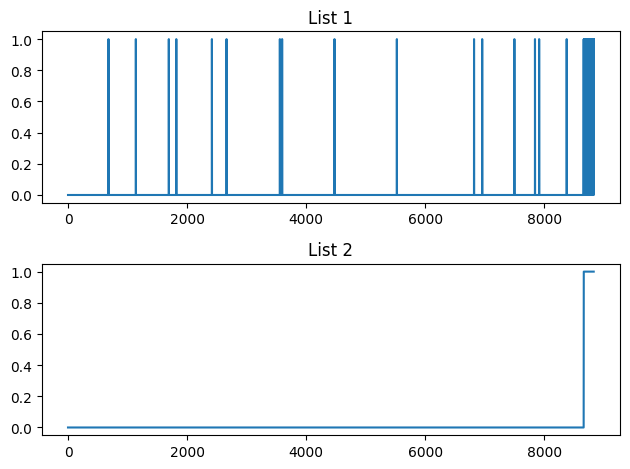

In [154]:
import matplotlib.pyplot as plt

# Example lists
list1 = y_pred
list2 = y_test

# Create a figure with subplots
fig, axs = plt.subplots(2, 1)

# Plot the first list in the first subplot
axs[0].plot(list1)

# Set a title for the first subplot
axs[0].set_title('List 1')

# Plot the second list in the second subplot
axs[1].plot(list2)

# Set a title for the second subplot
axs[1].set_title('List 2')

# Display the figure
plt.tight_layout()
plt.show()


In [126]:
count_values(y_pred)

0: 5069
1: 95


In [155]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score,roc_auc_score

print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))
print("ROC AUC Score:",  roc_auc_score(y_test, y_pred))

[[8650   16]
 [  55  114]]
Accuracy: 0.9919637804187889
Precision: 0.8769230769230769
Recall: 0.6745562130177515
F1 Score: 0.762541806020067
ROC AUC Score: 0.8363549585744192


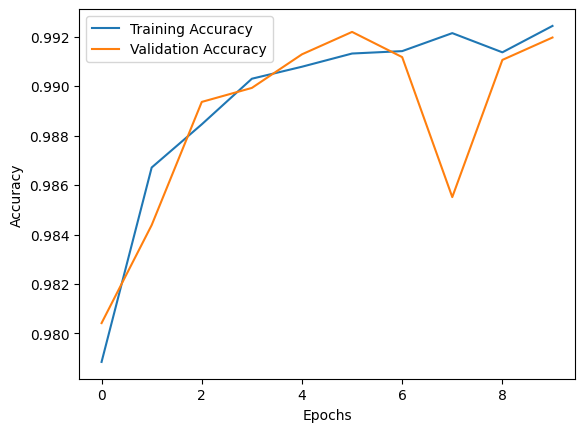

In [156]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

[0.058335550129413605, 0.04107781499624252, 0.026955464854836464, 0.027912940829992294, 0.029130570590496063, 0.024846982210874557, 0.023227887228131294, 0.03011578507721424, 0.02438335120677948, 0.02334926836192608]
[0.09570246934890747, 0.03635995090007782, 0.03260466083884239, 0.02802196703851223, 0.026618530973792076, 0.025360161438584328, 0.026216506958007812, 0.023136556148529053, 0.024949252605438232, 0.02209450863301754]


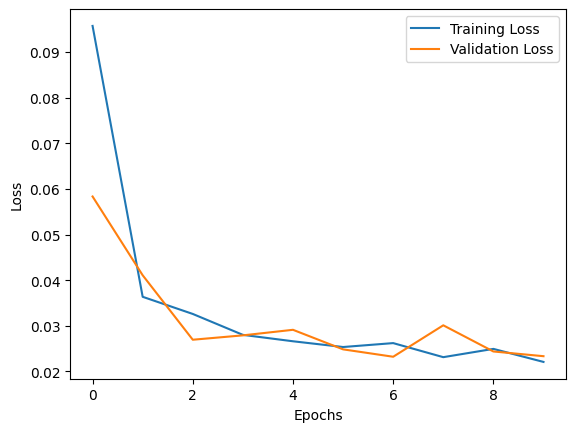

In [157]:
loss=history.history['loss']
val_loss=history.history['val_loss']
print(val_loss)
print(loss)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model.save('')